In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [80]:
df1= pd.read_csv('Banglore_housing_data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df1.shape

(13320, 9)

In [10]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [19]:
# remove features that are not required
df2=df1.drop(['availability','society'],axis='columns')
df2.shape

(13320, 7)

In [20]:
# Handle null values
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [21]:
df3=df2.dropna()
df3.shape

(12710, 7)

In [28]:
df3['no_of_bedrooms']=df3['size'].apply(lambda x:int(x.split(' ')[0]))
df3.head()

C:\Users\primi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [30]:
# total_sqrt has different types  so make it uniform
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [37]:
df3[~df3['total_sqft'].apply(is_float)].head(15)

,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Super built-up Area,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Super built-up Area,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [38]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
 

In [39]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

C:\Users\primi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
df3.isnull().sum()

area_type          0
location           0
size               0
total_sqft        42
bath               0
balcony            0
price              0
no_of_bedrooms     0
dtype: int64

In [43]:
df4=df3.dropna()
df4.shape

(12668, 8)

In [44]:
# Add new feature price per sqft 
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

C:\Users\primi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [50]:
# explore location column 
df4.location=df4.location.apply(lambda x:x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
other                 2741
Whitefield             514
Sarjapur  Road         372
Electronic City        302
Kanakpura Road         259
                      ... 
ISRO Layout             11
Banjara Layout          11
Prithvi Layout          11
Tindlu                  11
Pattandur Agrahara      11
Name: location, Length: 236, dtype: int64

In [47]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura                           10
HAL 2nd Stage                           10
Gunjur Palya                            10
1st Block Koramangala                   10
Doddaballapur                           10
                                        ..
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
Kengeri Satellite Town ( BDA SITE)       1
1 Annasandrapalya                        1
Name: location, Length: 1013, dtype: int64

In [48]:
df4.location=df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

In [55]:
df4[df4.total_sqft/df4.no_of_bedrooms<300]
#df4.boxplot(column=['total_sqft'])

,area_type,location,size,total_sqft,bath,balcony,price,no_of_bedrooms,price_per_sqft
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Built-up Area,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Plot Area,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268
...,...,...,...,...,...,...,...,...,...
13219,Plot Area,Laggere,7 Bedroom,1590.0,9.0,3.0,132.0,7,8301.886792
13221,Plot Area,other,9 Bedroom,1178.0,9.0,1.0,75.0,9,6366.723260
13281,Plot Area,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


In [58]:
df5=df4[~(df4.total_sqft/df4.no_of_bedrooms<300)]
df5.shape

(12013, 9)

In [60]:
df5.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [65]:
# There is huge variation in price_per_sqft for same location so we can remove outlier by using std and mean

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(9852, 9)

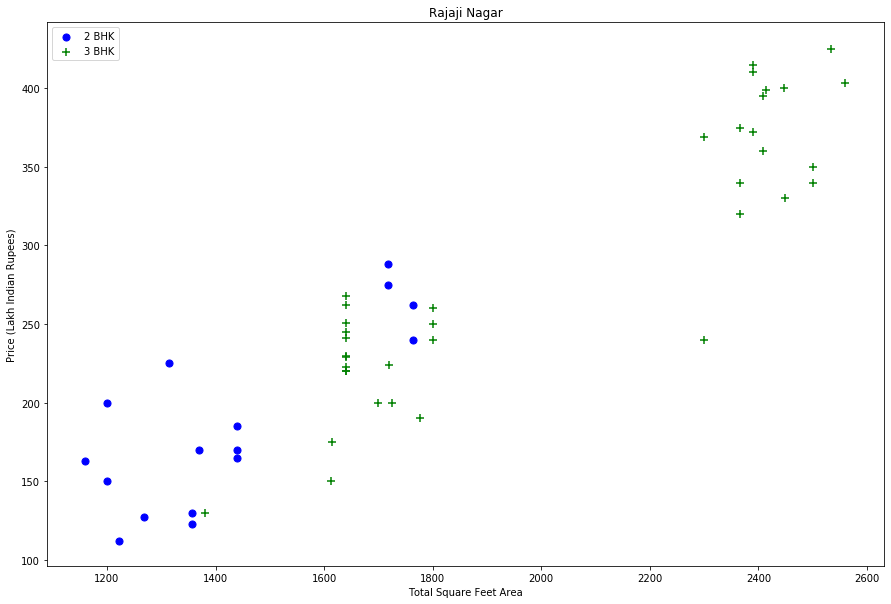

In [67]:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.no_of_bedrooms==2)]
    bhk3 = df[(df.location==location) & (df.no_of_bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

In [69]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for no_of_bedrooms, bhk_df in location_df.groupby('no_of_bedrooms'):
            bhk_stats[no_of_bedrooms] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for no_of_bedrooms, bhk_df in location_df.groupby('no_of_bedrooms'):
            stats = bhk_stats.get(no_of_bedrooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)

df7.shape

(7014, 9)

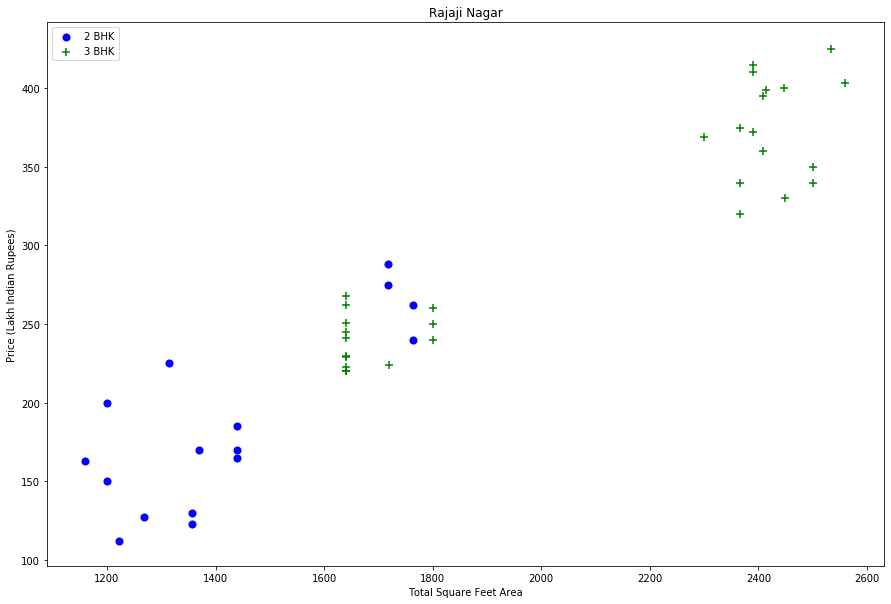

In [70]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [72]:
df7.groupby('bath')['bath'].agg('count')

bath
1.0      563
2.0     4108
3.0     1668
4.0      434
5.0      139
6.0       70
7.0       16
8.0       10
9.0        5
13.0       1
Name: bath, dtype: int64

In [77]:
#It is unusual to have 2 more bathrooms than number of bedrooms in a home so we remove that outlier
df8=df7[df7.bath<=df7.no_of_bedrooms+2]
df8.shape

(7011, 9)

In [79]:
df8.to_csv('bangalore_house_data_cleaned.csv',index=False)